In [1]:
import utils
import os
os.chdir(utils.ROOT)

In [2]:
from pipeline import runpipeline

STEP 1: LOAD GOLD DOCUMENTS AND CONCEPTS
Loading gold docs: Loading GENIA corpus ... NOTE: 13 files cannot get Constituent annotations!


Removing unigram Concepts: 100%|██████████| 1599/1599 [00:02<00:00, 540.64it/s]

Retrieving gold standard concepts ... 

Skipped 2 concepts not bounded at tokens boundaries and filtered out 0 with the POS-tag filter: None


  1%|          | 18/1599 [00:00<00:09, 172.74it/s]

Loading GENIA corpus without annotations ...


100%|██████████| 1599/1599 [00:08<00:00, 186.39it/s]


STEP 2: Run pre-processing and concept extraction pipeline
--- Running pre-processing pipeline ---
Opening CoreNLP annotator server. It may still be running after termination if shut-down is not stated explicitly.


Creating raw text corpus file:   2%|▏         | 26/1599 [00:00<00:06, 253.67it/s]

CoreNLP server shut down successfully.


Creating raw text corpus file: 100%|██████████| 1599/1599 [00:07<00:00, 213.70it/s]


Making colibri class file ...
Encoding corpus ...


Extracting candidates: 100%|██████████| 1599/1599 [00:14<00:00, 113.74it/s]


--- Running concept extraction pipeline ---
Extracted 106527 continuous candidates and 14409 discontinuous candidates.
Scoring, ranking and filtering concepts
Calculating C-values
Calculating Rectified Frequencies
Calculating TF-IDF values
Calculating Glossex values
Loading reference model for the first time.
Calculating length normalized PMI values
Calculating Term Coherence values
Calculating votes between rankers
Loading MeSH terms ...


Cleaning documents: 100%|██████████| 1599/1599 [00:00<00:00, 294825.57it/s]



STEP 3: EVALUATE
THRESHOLD = 6
Summary of CorpusReport for Concept
# extracted concepts: 35990
Precision: 0.422   (highest: 1.000, lowest: 0.000)
Recall:    0.335   (highest: 1.000, lowest: 0.000)
Error analysis of CorpusReport for Concept
17540 (84.35%) FP's occur elsewhere as a gold standard concept.
8060 (38.76%) FP's were verified in ontology source(s).
18796 (90.39%) FP's were accounted for in this analysis.
Corrected precision: 0.944
1877 (6.23%) FN's are above max n.
1090 (3.62%) FN's cannot be captured by the used POS-tag filter.
17778 (59.05%) FN's occur less often than the frequency threshold.
18806 (62.46%) FN's were accounted for in this analysis.
Corrected recall: 0.573

Summary of CorpusReport for DiscontinuousConcept
# extracted concepts: 3585
Precision: 0.032   (highest: 1.000, lowest: 0.000)
Recall:    0.073   (highest: 1.000, lowest: 0.000)
Error analysis of CorpusReport for DiscontinuousConcept
3204 (92.33%) FP's occur elsewhere as a gold standard concept.
880 (25.3

In [3]:
import pandas as pd
data = pd.DataFrame(
    {'freq_threshold': list(range(6, 7, 2)),
     'all_prec': [r.precision() for r in runpipeline.all_corpus_reports],
     'all_corr_prec': [r.corrected_precision() for r in runpipeline.all_corpus_reports],
     'all_recall': [r.recall() for r in runpipeline.all_corpus_reports],
     'all_corr_recall': [r.corrected_recall() for r in runpipeline.all_corpus_reports],
     'all_n_concepts': [len(r.predicted) for r in runpipeline.all_corpus_reports],
     'dc_prec': [r.precision() for r in runpipeline.all_dc_reports],
     'dc_corr_prec': [r.corrected_precision() for r in runpipeline.all_dc_reports],
     'dc_recall': [r.recall() for r in runpipeline.all_dc_reports],
     'dc_corr_recall': [r.corrected_recall() for r in runpipeline.all_dc_reports],
     'dc_n_concepts': [len(r.predicted) for r in runpipeline.all_dc_reports],
     'types_prec': [r.precision() for r in runpipeline.all_types_reports],
     'types_corr_prec': [r.corrected_precision() for r in runpipeline.all_types_reports],
     'types_recall': [r.recall() for r in runpipeline.all_types_reports],
     'types_corr_recall': [r.corrected_recall() for r in runpipeline.all_types_reports],
     'types_n_concepts': [len(r.predicted) for r in runpipeline.all_types_reports]
    }
)

In [4]:
import seaborn as sns

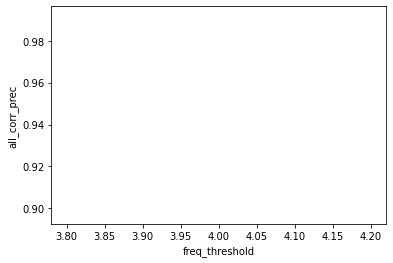

In [5]:
sns.lineplot(data['freq_threshold'], data['all_corr_prec'])

In [6]:
print(runpipeline.configs.__dict__)

{'freq_threshold': 2, 'c_value_threshold': 2, 'max_n': 5, 'skipgrams': False, 'bridge_strength_threshold': 0.5, 'freq_factor': 1, 'coord_dcs': True, 'hypernym_dcs': True, 'consider_dcs_in_ranking': False, 'extraction_filter': 'simple'}


In [7]:
if input('Save the results? ') == 'y':
    save_dir = '/home/kasper/Dropbox/Masters thesis/pipeline-results/'
    name = input('File name: ')
    data.to_csv(save_dir + name + '.csv', )

Save the results? y
File name: test-genia


In [8]:
dc_ranks = {
    c: runpipeline.metrics[c.normalized_concept()][runpipeline.cm.Metrics.VOTER]
    if runpipeline.cm.Metrics.VOTER in runpipeline.metrics[c.normalized_concept()]
    else 0 for c in runpipeline.all_dc_reports[0].predicted}

In [9]:
from stats import conceptstats
import math

In [10]:
for dc, score in sorted(sorted_dcs.items(), key=lambda x: x[1], reverse=True):
    bridge = dc.get_bridges()[0]
    bridge_strength = conceptstats.ngram_pmi(bridge[0].lemma(), bridge[1].lemma(), runpipeline.ngram_model)\
        + math.log10(runpipeline.ngram_model[(bridge[0].lemma(), bridge[1].lemma())]) 
    print(' '.join(dc.normalized_concept()), dc.get_context(), score, bridge_strength, sep='\t')

NameError: name 'sorted_dcs' is not defined